Aplicación de proyección de caudales usando el modelo SARIMA

Referencia: How to forecast sales with Python using SARIMA model

Link:https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
df = pd.read_excel("Caudales.xlsx")

In [ ]:
y = df.set_index('Semana')
y.head(5)

,Caudal
Semana,
2000-01-22,69.30963
2000-01-29,59.81791
2000-02-05,61.95215
2000-02-12,96.10415
2000-02-19,253.08719


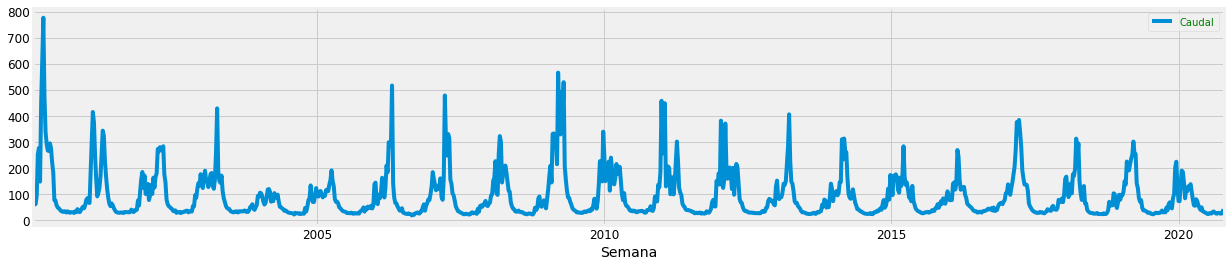

In [ ]:
y.plot(figsize=(19, 4))
plt.show()

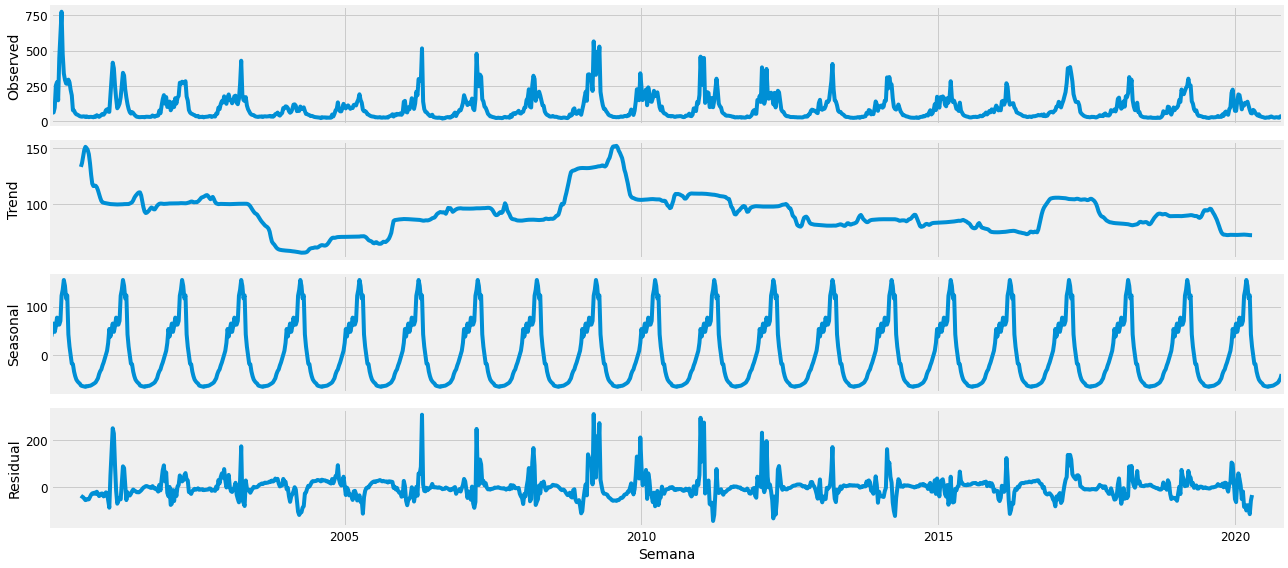

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)12 - AIC:13581.719670742914
ARIMA(0, 0, 0)x(0, 1, 0, 52)12 - AIC:11847.250214127173


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1),seasonal_order=(1, 1, 1, 52),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5927      0.017     35.383      0.000       0.560       0.626
ma.L1         -0.9822      0.007   -135.049      0.000      -0.996      -0.968
ar.S.L52      -0.0608      0.010     -5.877      0.000      -0.081      -0.041
ma.S.L52      -1.0000      0.016    -61.525      0.000      -1.032      -0.968
sigma2      1643.4524   9.89e-06   1.66e+08      0.000    1643.452    1643.452


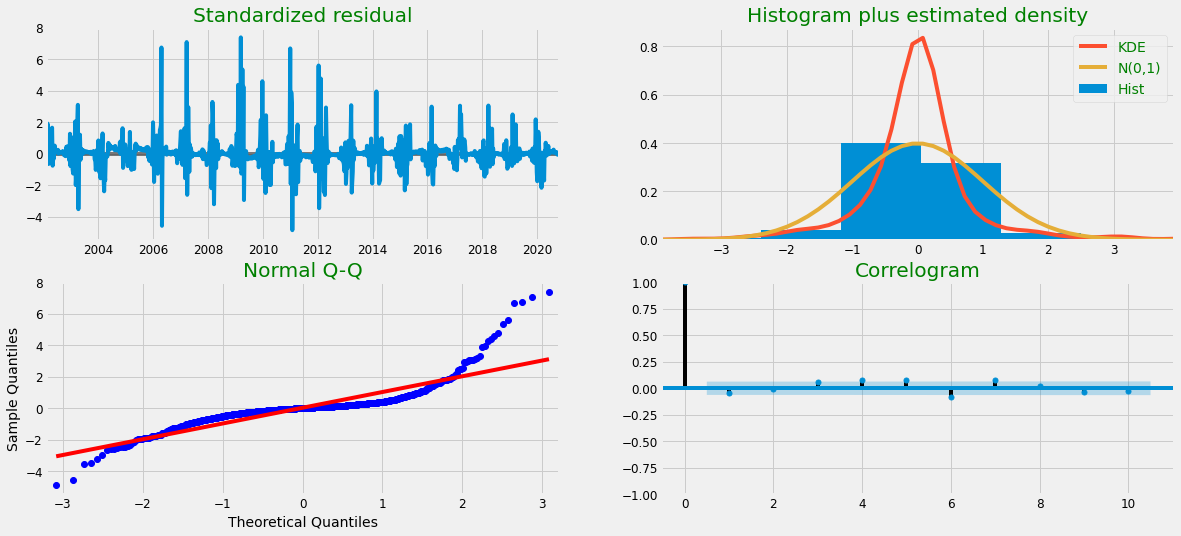

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

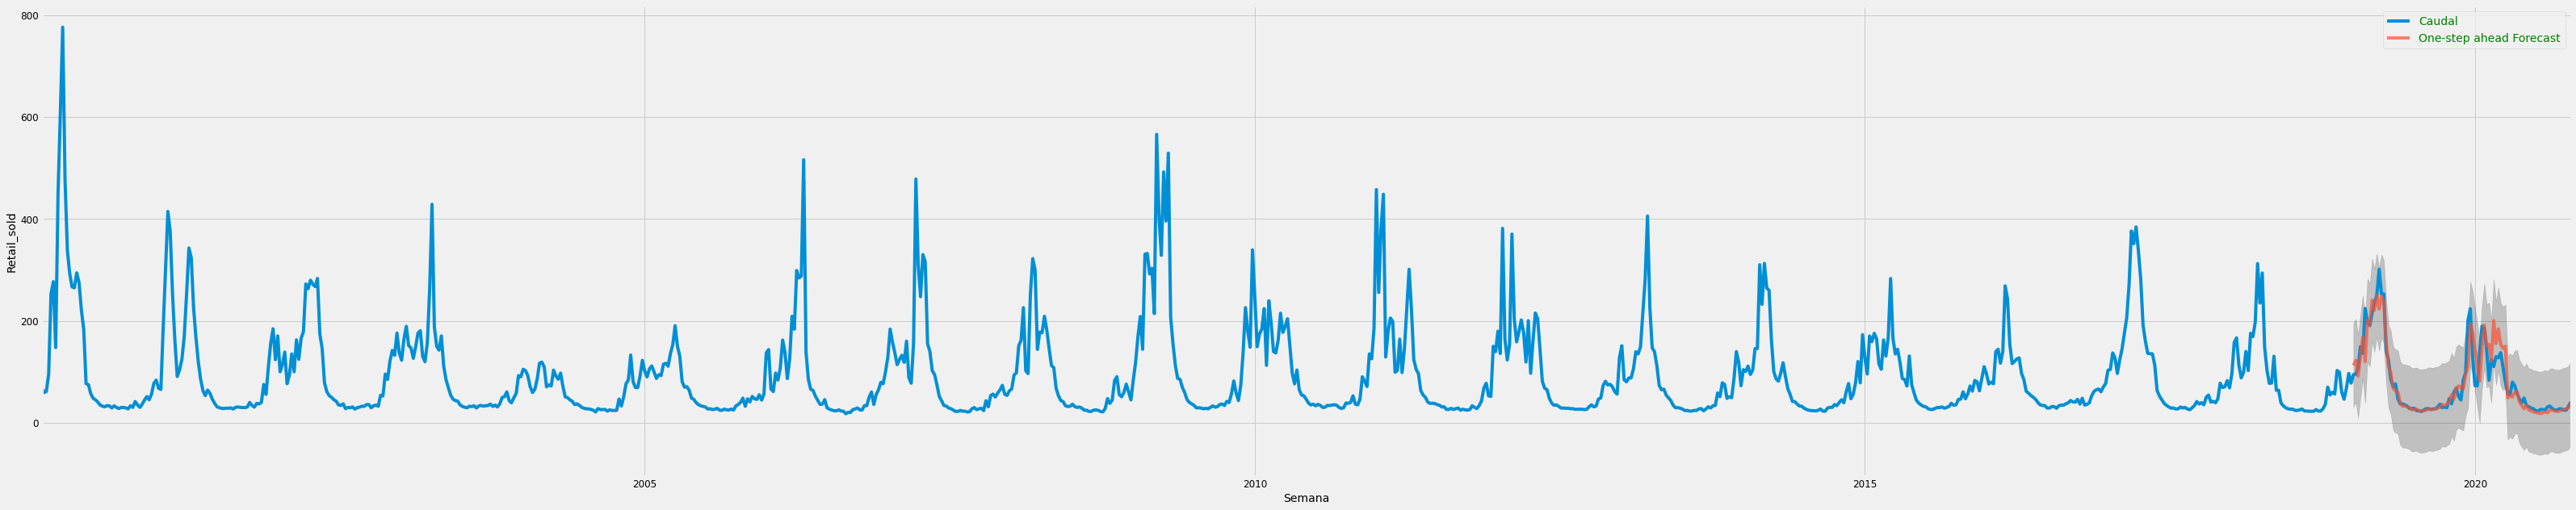

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-05'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2000':].plot(label='observed')

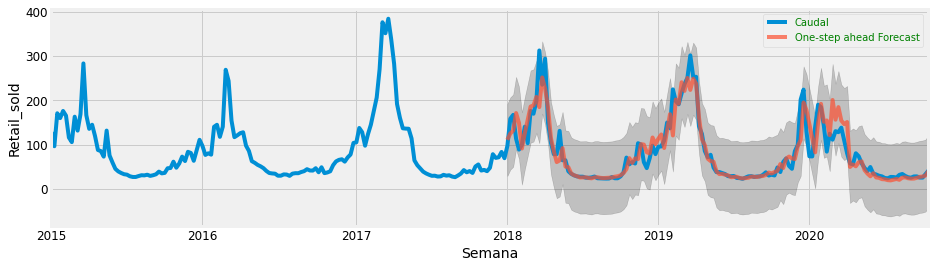

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-06'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Semana')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_forecasted = pred.predicted_mean
y_forecasted_v=y_forecasted.to_frame(name='Caudal')
y_truth = y['2019-01-05':]
mse = ((y_forecasted_v - y_truth) ** 2).mean()
R2=r2_score(y_forecasted_v, y_truth)
mae=mean_absolute_error(y_forecasted_v, y_truth)
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
print('The Mean Absolute Error is {}'.format(round(np.sqrt(mse), 2)))
print('R2 factor is {}'.format(round(R2, 2)))
print(y_forecasted)
print(y_truth)

The Mean Squared Error is Caudal    780.51
dtype: float64
The Root Mean Squared Error is Caudal    27.94
dtype: float64
The Mean Absolute Error is Caudal    27.94
dtype: float64
R2 factor is 0.83
2019-01-05    113.329490
2019-01-12    122.700519
2019-01-19     92.145164
2019-01-26    131.541107
2019-02-02    168.640643
                 ...    
2020-09-19     24.663288
2020-09-26     26.846034
2020-10-03     27.679704
2020-10-10     29.926371
2020-10-17     40.145940
Freq: W-SAT, Length: 94, dtype: float64
               Caudal
Semana               
2019-01-05   95.08172
2019-01-12   95.65000
2019-01-19  109.29957
2019-01-26  149.65083
2019-02-02  136.57714
...               ...
2020-09-19   27.98657
2020-09-26   25.25900
2020-10-03   25.18557
2020-10-10   33.12600
2020-10-17   41.12714

[94 rows x 1 columns]


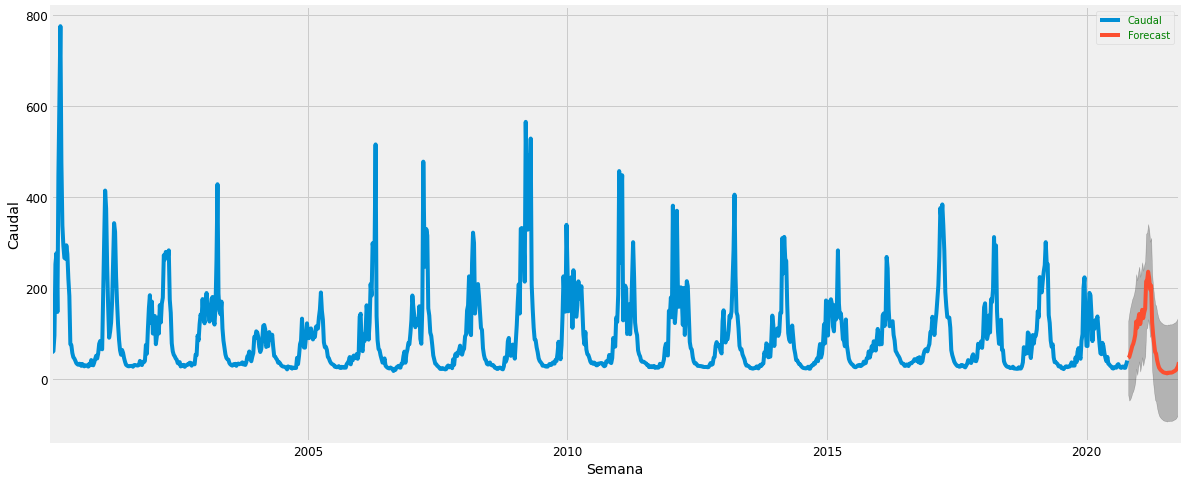

In [ ]:
pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(18, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Semana')
ax.set_ylabel('Caudal')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_forecasted.head(94)

2019-01-05    113.329490
2019-01-12    122.700519
2019-01-19     92.145164
2019-01-26    131.541107
2019-02-02    168.640643
                 ...    
2020-09-19     24.663288
2020-09-26     26.846034
2020-10-03     27.679704
2020-10-10     29.926371
2020-10-17     40.145940
Freq: W-SAT, Length: 94, dtype: float64